In [1]:
##Section 1: import and explore
import pandas as pd 
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import style

df = pd.read_csv('C:/Users/jcarr/Documents/NU/MS-ML/titanic.csv')

df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
#Summary statistics
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


We can see from the non-null count column that cabin has quite a few missing values.  Age also has some missing data.  If we were building a model we would need to decide what to do with the missing data.  Other fields such as sex are not numeric.  We may wish to assign a binary variable if we wish to use this field.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


20-30 year olds were the prominant age group without any notable differences among sex.

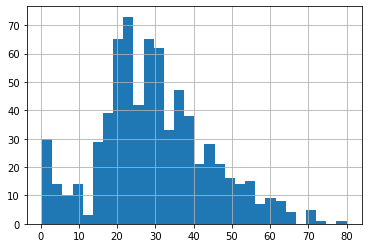

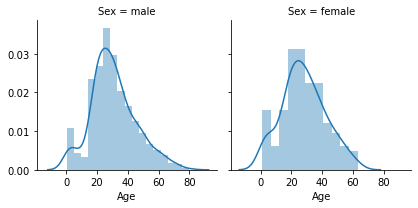

In [4]:
df["Age"].hist(bins=30)

g = sns.FacetGrid(df,col='Sex')
g = g.map(sns.distplot,"Age")



Female survival rate is higher than males.

Text(0.5, 1.0, 'Female')

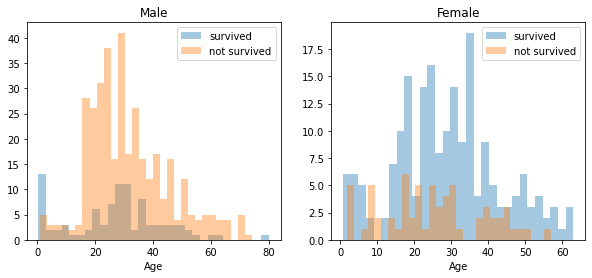

In [5]:
#Reference www.kaggle.com/jkokatjuhha/in-depth-visualisations-simple-methods

fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(10,4))
male=df[df['Sex']=='male']
female=df[df['Sex']=='female']

ax=sns.distplot(male[male['Survived']==1].Age.dropna(),bins=30,label='survived',ax=axes[0],kde=False)
ax=sns.distplot(male[male['Survived']==0].Age.dropna(),bins=30,label='not survived',ax=axes[0],kde=False)
ax.legend()
ax.set_title('Male')

ax = sns.distplot(female[female['Survived']==1].Age.dropna(),bins=30,label='survived',ax=axes[1],kde=False)
ax = sns.distplot(female[female['Survived']==0].Age.dropna(),bins=30,label='not survived',ax=axes[1],kde=False)
ax.legend()
ax.set_title('Female')